In [2]:
# Import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
from pandas.tools.plotting import table

In [5]:
# import csv dataset as pandas dataframe
df = pd.read_csv("../data/standard_1.csv", sep=',')

In [6]:
print(df)

     Unnamed: 0      goodDay1      goodDay2 program MLcourse IRcourse  \
0           1.0  productivity         sleep     QRM       no       no   
1           2.0         other         other      CS       no       no   
2           3.0          food         sport      BA      yes      yes   
3           4.0         other         other      BA      yes      yes   
4           5.0         sleep        social     BDE       no       no   
5           6.0          food      relaxing  others       no       no   
6           7.0          food          food      CS      yes      yes   
7           8.0       weather        social     CLS       no       no   
8           9.0       weather       weather      EC       no       no   
9          10.0      relaxing      relaxing      BI      yes      yes   
10         11.0        coffee       weather      EC       no       no   
11         12.0         other        coffee      CS       no       no   
12         13.0       weather          food      BI

In [10]:
df1 = df.iloc[:,1:15]

In [11]:
print(df1.head())

       goodDay1 goodDay2 program MLcourse IRcourse StatsCourse DBcourse  \
0  productivity    sleep     QRM       no       no         yes       no   
1         other    other      CS       no       no     unknown      yes   
2          food    sport      BA      yes      yes          no      yes   
3         other    other      BA      yes      yes         yes      yes   
4         sleep   social     BDE       no       no          no      yes   

  choco_op gender stand  bedtime  neighbors  randomNum money  
0  neither   male    no      1.0      300.0        7.0   NaN  
1  no idea   male   yes      NaN      100.0   394749.0  0.05  
2  neither   male    no     23.0        5.0        6.0   NaN  
3  no idea   male    no      0.2        2.0        8.0   NaN  
4  no idea   male    no      0.0        6.0        8.0     0  


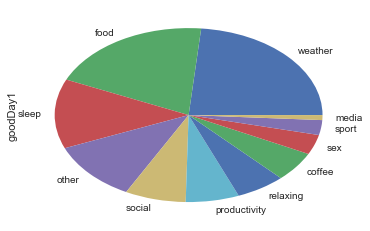

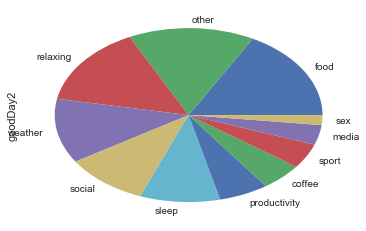

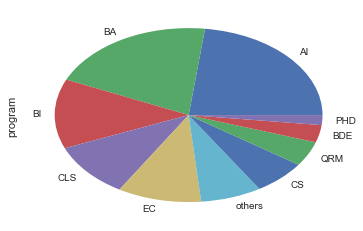

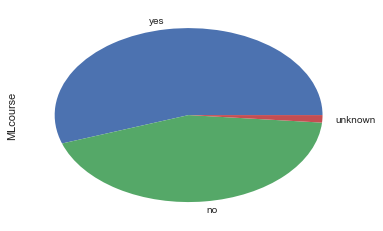

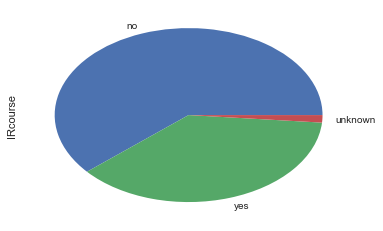

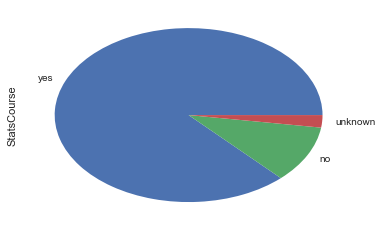

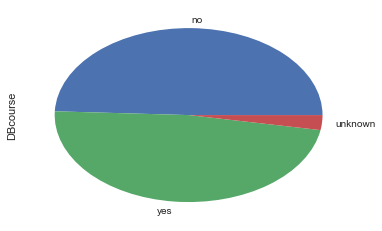

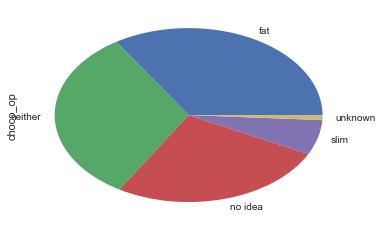

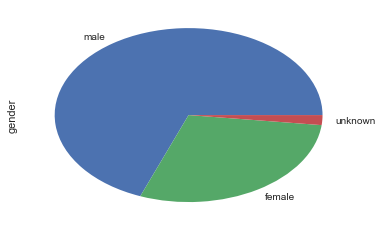

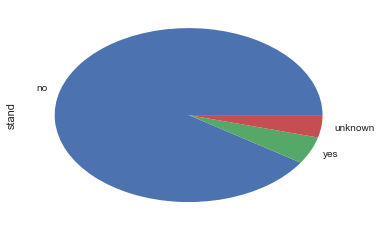

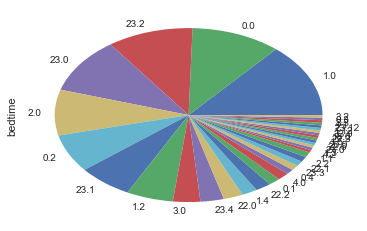

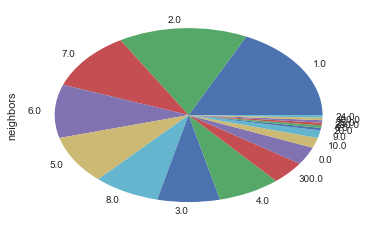

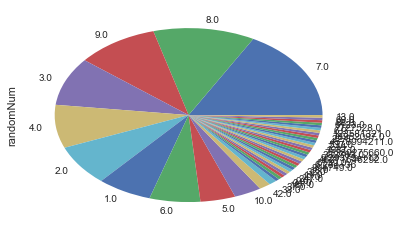

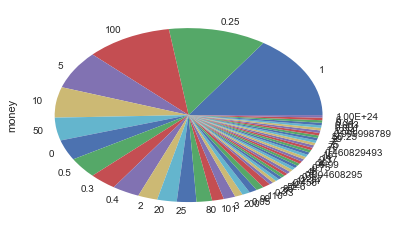

In [12]:
for i in df1:
    df1[i].value_counts().plot(kind='pie')
    plt.show()

In [13]:
df1.describe()

,bedtime,neighbors,randomNum
count,212.000000,212.000000,2.120000e+02
mean,9.799717,18.662736,2.962264e+34
std,10.761846,62.751414,4.313122e+35
min,0.000000,0.000000,0.000000e+00
25%,1.000000,2.000000,4.000000e+00
50%,2.000000,4.000000,7.000000e+00
75%,23.000000,7.000000,9.000000e+00
max,33.000000,300.000000,6.280000e+36


In [14]:
df1.gender.value_counts()

male       150
female      63
unknown      4
Name: gender, dtype: int64

In [15]:
df1.StatsCourse.value_counts()

yes        189
no          23
unknown      5
Name: StatsCourse, dtype: int64

In [16]:
df1.DBcourse.value_counts()

no         107
yes        104
unknown      6
Name: DBcourse, dtype: int64

In [17]:
df1.IRcourse.value_counts()

no         133
yes         81
unknown      3
Name: IRcourse, dtype: int64

In [18]:
df1.choco_op.value_counts()

fat        74
neither    70
no idea    57
slim       14
unknown     2
Name: choco_op, dtype: int64

Explore gender and chocolate. Is there a correlation between gender and your opinion on chocolate?

In [19]:
df2 = df1.iloc[:, 7:9]
print(df2.head())

  choco_op gender
0  neither   male
1  no idea   male
2  neither   male
3  no idea   male
4  no idea   male


In [20]:
mleh = df2.sort_values('gender')
print(mleh)

    choco_op   gender
145  no idea   female
94       fat   female
150      fat   female
52       fat   female
181      fat   female
182  no idea   female
48       fat   female
59       fat   female
47       fat   female
103  no idea   female
146      fat   female
187  neither   female
82       fat   female
39   neither   female
107     slim   female
101  no idea   female
37       fat   female
93   neither   female
171  neither   female
158  no idea   female
78   no idea   female
76   neither   female
75      slim   female
74       fat   female
73      slim   female
61       fat   female
71       fat   female
165  neither   female
68   no idea   female
89   neither   female
..       ...      ...
122  no idea     male
124  neither     male
125  no idea     male
114     slim     male
97      slim     male
98   no idea     male
80   neither     male
64   no idea     male
65       fat     male
66       fat     male
67   unknown     male
69   no idea     male
72   no idea     male
77   no id

In [21]:
female = df2.loc[df['gender'] == 'female']
female.choco_op.value_counts()

fat        24
neither    18
no idea    17
slim        4
Name: choco_op, dtype: int64

In [22]:
female.count()

choco_op    63
gender      63
dtype: int64

In [23]:
male = df2.loc[df['gender'] == 'male']
male.choco_op.value_counts()

neither    51
fat        48
no idea    39
slim       10
unknown     2
Name: choco_op, dtype: int64

In [24]:
male.count()

choco_op    150
gender      150
dtype: int64

What about the gender distribution among the majors?

In [25]:
df3 = pd.DataFrame(data=df1.program)
df3['gender'] = df1.gender.values
print(df3.head())

  program gender
0     QRM   male
1      CS   male
2      BA   male
3      BA   male
4     BDE   male


In [26]:
female = df.loc[df['gender'] == 'female']
female.program.value_counts()

AI        19
BI        14
BA        12
CLS        6
EC         6
others     3
CS         2
PHD        1
Name: program, dtype: int64

In [27]:
male = df.loc[df['gender']== 'male']
male.program.value_counts()

AI        31
BA        30
CLS       16
EC        15
others    13
BI        13
CS        12
QRM       10
BDE        7
PHD        3
Name: program, dtype: int64

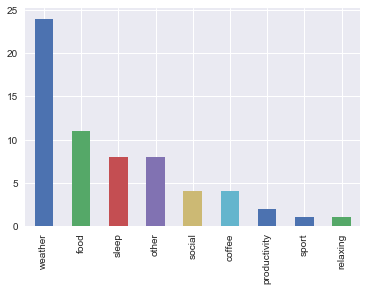

In [28]:
female.goodDay1.value_counts().plot(kind='bar')
plt.show()

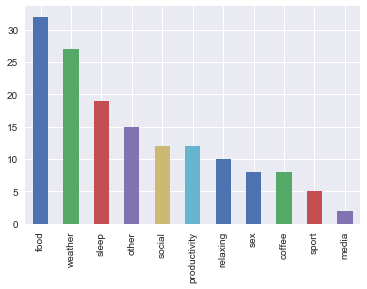

In [29]:
male.goodDay1.value_counts().plot(kind='bar')

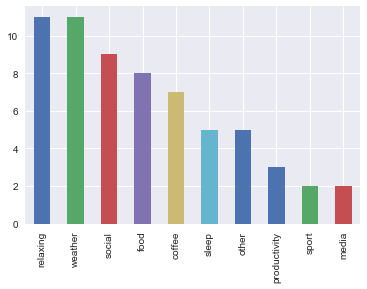

In [30]:
female.goodDay2.value_counts().plot(kind='bar')

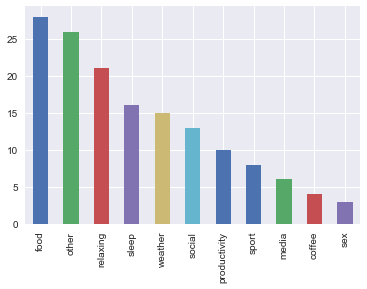

In [31]:
male.goodDay2.value_counts().plot(kind='bar')

Gotta find a way to combine the goodDay data.

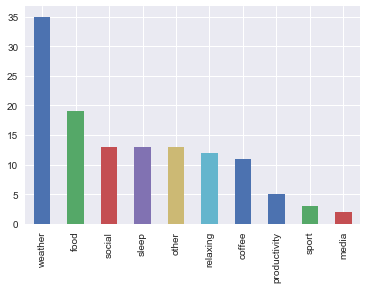

In [32]:
goodF = female.iloc[:, 1]
goodF = goodF.append(female.goodDay2)
goodF.value_counts().plot(kind='bar')

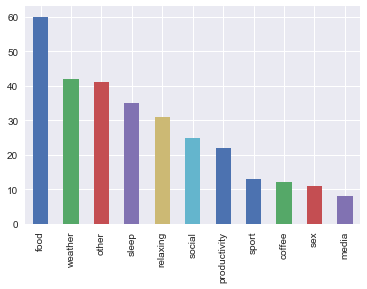

In [33]:
goodM = male.iloc[:, 1]
goodM = goodM.append(male.goodDay2)
goodM.value_counts().plot(kind='bar')

In [34]:
corr = df1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

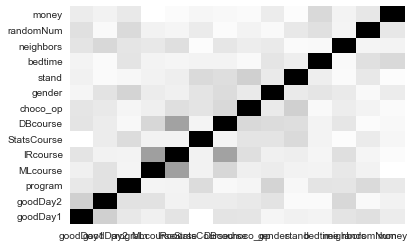

In [35]:
plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.show()

In [36]:
import seaborn as sns
%matplotlib inline

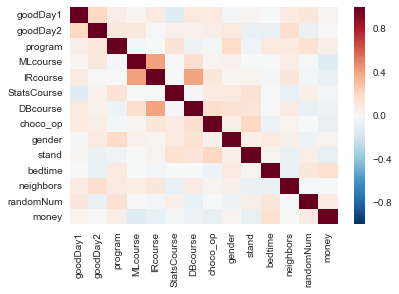

In [37]:
sns.heatmap(corr, annot=False)

In [38]:
df1.describe()

,bedtime,neighbors,randomNum
count,212.000000,212.000000,2.120000e+02
mean,9.799717,18.662736,2.962264e+34
std,10.761846,62.751414,4.313122e+35
min,0.000000,0.000000,0.000000e+00
25%,1.000000,2.000000,4.000000e+00
50%,2.000000,4.000000,7.000000e+00
75%,23.000000,7.000000,9.000000e+00
max,33.000000,300.000000,6.280000e+36


In [39]:
categorical = df1.drop('bedtime', axis=1)
categorical = categorical.drop('neighbors', axis=1)
categorical = categorical.drop('randomNum', axis=1)
categorical.describe()

,goodDay1,goodDay2,program,MLcourse,IRcourse,StatsCourse,DBcourse,choco_op,gender,stand,money
count,217,217,217,217,217,217,217,217,217,217,212
unique,11,11,10,3,3,3,3,5,3,3,52
top,weather,food,AI,yes,no,yes,no,fat,male,no,1
freq,51,37,50,120,133,189,107,74,150,197,33


In [40]:
# import csv dataset as pandas dataframe
raw = pd.read_csv("../data/ODI-2018.csv", sep=',')
raw.describe()

,Timestamp,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,"You can get £100 if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would get then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,217,217,217,217,217,217,217,217,217,217,217,212,217,217,217,217
unique,14,91,3,3,3,3,3,5,208,28,3,52,45,88,136,156
top,4/5/2018 11:27,AI,yes,0,mu,nee,male,fat,1/3/1995,1,no,1,7,1:00,Sun,Good food
freq,150,37,120,133,189,107,150,74,2,38,197,33,36,18,14,7


In [41]:
# import csv dataset as pandas dataframe
encoded = pd.read_csv("../data/encoded.csv", sep=',')

In [42]:
encoded_clean = encoded.dropna()

In [ ]:
# Make a PCA of all the features
from sklearn.decomposition import PCA

# Create new PCA model (Use 2 components)
pca = PCA(n_components = 2)

# Fit the scaled data to the model
pca_fitted = pca.fit_transform(encoded_clean)

# Create a new dataframe to store PC's
pca_df = pd.DataFrame(data = pca_fitted, columns = ['PC1', 'PC2'])


# Print the explain variance calculated
print("PC1 explains: ", pca.explained_variance_ratio_[0] * 100, "%")
print("PC2 explains: ", pca.explained_variance_ratio_[1] * 100, "%")
pc1_axis = round(pca.explained_variance_ratio_[0] * 100, 1)
pc2_axis = round(pca.explained_variance_ratio_[1] * 100, 1)

In [ ]:
# Make a scatterplot of the values
X = pca_df.PC1
y = pca_df.PC2

scatter = plt.scatter(X, y)
scatter